# Building Simple Neural Networks (Pseudologistic regression)

with help from these [notebooks](https://github.com/stephencwelch/Neural-Networks-Demystified)

By The End Of This Session You Should Be Able To:
----

- Fit data with a pseudologistic regression/ perceptron model
- Remember the power of matrix algebra and calculus 
- Explain the fundamentals of gradient descent

Following on from the previous lectures, it's time to apply the ideas we've covered into a working machine learning model. Let's first spend a bit of time on the data we'll need to illustrate the idea. We will study the performance of a given student on a test (say me) with respect to hours sleeping and hours studying (the two main inputs of student performance...?). 

In [1]:
import seaborn as sns
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# X = (hours sleeping, hours studying)
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)

Now that we have some data, we’re going to use it to train a model to predict how you will do on your next test, based on how many hours you sleep and how many hours you study.


### Review
* What assumptions does the above statement make with respect to the design of this problem?
* What type of machine learning problem is this?

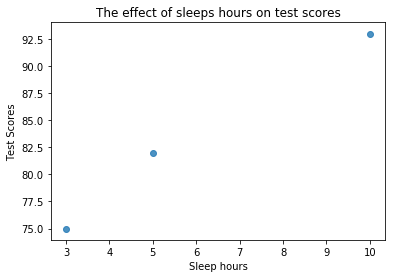

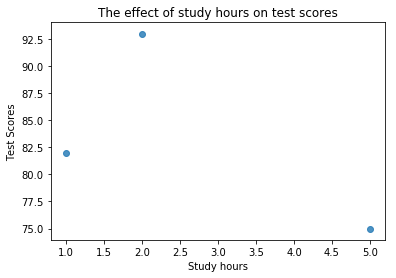

In [3]:
# A little data exploration never hurt

sns.regplot(x=X[:,0],
           y=y,
           fit_reg=False);
plt.title("The effect of sleeps hours on test scores");
plt.xlabel('Sleep hours');
plt.ylabel('Test Scores');
plt.show()
sns.regplot(x=X[:,1],
           y=y,
           fit_reg=False);
plt.title("The effect of study hours on test scores");
plt.xlabel('Study hours');
plt.ylabel('Test Scores');
plt.show()


------
Normalization
------

Before we throw our data into the model, we need to account for differences in the units of our data. Both of our inputs are in hours, but our output is a test score, scaled between 0 and 100. 

Why do we do this? It is standard practice in most machine learning models. Choosing not to do it is akin to asking our model to compare apples to oranges. Models in general are set up to derive comparisons of features **relative to themselves**, (thus apples to apples). The solution is to scale the data to a uniform standard. 

Here, we're going to take advantage of the fact that all of our data is positive, and simply divide by the maximum value for each variable, effectively scaling the result between 0 and 1. In more complex applications, you can use scikit's [StandardScaler()](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), or write something similar yourself. 

## Our Network Design

![](images/simpleNetwork.png)

### A word about the above design

<h3 align = 'center'> Variables </h3>

|Code Symbol | Math Symbol | Definition | Dimensions
| :-: | :-: | :-: | :-: |
|X|$$X$$|Input Data, each row is an example| (numExamples, input_layer_size)|
|y |$$y$$|target data|(numExamples, output_layer_size)|
|yHat | $$\hat{y}$$|predicted value|(numProblems, output_layer_size)|

-----
#### Parameters & hyperparameters
----

Our neural network's __parameters__ are the weights between the nodes.

Our network's __hyperparameters__ are the 2 inputs, 3 hidden units, and 1 output. 

In general, paramters change for each dataset. Hyperparameters do __not__ change across minor changes in datasets.

Today, we'll learn just the parameters. (Later we'll also learn the hyperparameters.)

## Learning how to Predict (Training the Network)

We will now introduce you to backpropagation, the process of iteratively updating the weights of a neural network. This differs from typical model optimization, because the system of neurons does not learn as a whole. Each neuron learns its parameters with respect to other neurons. Thus optimization does not take place in terms of a smooth linear descent down a loss function gradient, but instead contains a great deal of noise and change, as each neuron in the network learns to cooperate with its neighbors. This means for very large (deep) NN, a great deal of complexity is involved in optimization. 


[Backpropagation]()  takes place in 3 steps:
1. Forward propagation - The network makes a prediction based on the current weights of each neuron.
2. Backward propagation - The network updates the gradient based on information returned by the loss function.
3. Update - Each neuron's weights are updated according to the gradient.

Pseudocode

      initialize network weights (often small random values)
      while stopping_criterion not satisfied
         for (training example) ex in training_samples
            prediction = neural-net-output(network, ex)  // forward pass
            actual = teacher-output(ex)
            compute error (prediction - actual) at the output units
            compute Δ w h for all weights from hidden layer to output layer 
            compute Δ w i for all weights from input layer to hidden layer 
            update network weights // input layer not modified by error estimate



Each input value, or element in matrix X, needs to be multiplied by a corresponding weight and then added together with all the other results for each neuron. This is a complex operation, but if we take the three outputs we're looking for as a single row of a matrix, and place all our individual weights into a matrix of weights, we can create the exact behavior we need by multiplying our input data matrix by our weight matrix. 

Using matrix multiplication allows us to pass multiple inputs through at once by simply adding rows to the matrix X. From here on out, we'll refer to these matrices as X, W one, and z two, where z two the activity of our second layer. 

-----

<h3 align = 'center'> Variables So Far</h3>

|Code Symbol | Math Symbol | Definition | Dimensions
| :-: | :-: | :-: | :-: |
|X|$$X$$|Input Data, each row in an example| (numExamples, input_layer_size)|
|y |$$y$$|target data|(numExamples, output_layer_size)|
|yHat | $$\hat{y}$$|predicted value|(numProblems, output_layer_size)|
|W1 | $$W^{(1)}$$ | Layer 1 weights | (input_layer_size, hidden_layer_size) |
|W2 | $$W^{(2)}$$ | Layer 2 weights | (hidden_layer_size, output_layer_size) |
|z2 | $$z^{(2)}$$ | Layer 2 activation | (numExamples, hidden_layer_size) |
|a2 | $$a^{(2)}$$ | Layer 2 activity | (numExamples, hidden_layer_size) |
|z3 | $$z^{(3)}$$ | Layer 3 activation | (numExamples, output_layer_size) |


Notice that each entry in z is a sum of weighted inputs to each hidden neuron. Z is of size 3 by 3, one row for each example, and one column for each hidden unit. Matrix notation is really nice here, because it allows us to express the complex underlying process in a single line!

$$
z^{(2)} = XW^{(1)} \tag{1}\\
$$

## The Activation Function

Once the inputs are obtained (from $W$) for our second layer, $z^{(2)}$, we need to apply the activation function. 

We'll independently apply the function to each entry in matrix z using a python method for this called sigmoid, because we’re using a sigmoid as our activation function. 

In [4]:
# Here is an example of how this is going to work in python

def sigmoid(z):
    "Define sigmoid activation function to scalar, vector, or matrix"
    return 1/(1+np.exp(-z))

sigmoid(np.random.randn(3,3))

array([[ 0.22503387,  0.38898943,  0.81174154],
       [ 0.46819106,  0.42946586,  0.67095897],
       [ 0.2313917 ,  0.67079764,  0.45470459]])

-----
Forward propagation
----

Formula for forward propagation, using f to denote our activation function.

We can write that $a^{(2)}$, our second layer activity, is equal to f of $z^{(2)}$. $a^{(2)}$ will be a matrix of the same size as $z^{(2)}$, 3 by 3.

$$
a^{(2)} = f(z^{(2)}) \tag{2}\\
$$

To finish forward propagation we need to propagate $a^{(2)}$ all the way to the output, $\hat{y}$. We've already done the heavy lifting in the previous layer, so all we have to do now is multiply $a^{(2)}$ by our second layer weights $W^{(2)}$ and apply one more activation function. W2 will be of size 3x1, one weight for each synapse. Multiplying $a^{(2)}$ , a 3 x 3 matrix, by $W^{(2)}$ , a 3 x 1 matrix results in a 3 x 1 matrix $z^{(3)}$, the activity or our third layer. $z^{(3)}$ has three activity values, one for each example. 

Finally, we'll apply our activation function to $z^{(3)}$ yielding our official estimate of your test score, $\hat{y}$.  

$$
z^{(3)} = a^{(2)}W^{(2)} \tag{3}\\
$$
$$
\hat{y} = f(z^{(3)}) \tag{4}\\
$$

Of course the predictions from this network are going to be pointlessly bad, as the weights are random at this point. We need to create a way by which we can optimize the weights cleanly 

---
## Loss & Cost Function
----

When someone says they’re training a network, what they really mean is that they're minimizing a **cost** function. 

**Loss:** A quantification of prediction error

**Cost:** A quantification of prediction error with respect to the overall objectives of the model

**Objective:** Any function to be optimized in machine learning

The standard approach to adding in loss to machine learning cost functions is to use a squared loss:

$$
J = \sum \frac{1}{2}(y-\hat{y})^2 \tag{5}
$$

And this is what we are going to do in this case.

# Implementation I: Forward Propagation

$$
z^{(2)} = XW^{(1)} \tag{1}\\
$$
$$
a^{(2)} = f(z^{(2)}) \tag{2}\\
$$
$$
z^{(3)} = a^{(2)}W^{(2)} \tag{3}\\
$$
$$
\hat{y} = f(z^{(3)}) \tag{4}\\
$$
$$
J = \sum \frac{1}{2}(y-\hat{y})^2 \tag{5}\\
$$


At this point, we can implement all of the above vector equations and ideas in a class structure:

In [5]:
class NeuralNetwork:
    "Simple neural network"
    
    def __init__(self):  
        # Network architecture      
        self.input_layer_size  = 2
        self.hidden_layer_size = 3
        self.output_layer_size = 1
        
        # Weights 
        self.W1 = np.random.randn(self.input_layer_size, self.hidden_layer_size)
        self.W2 = np.random.randn(self.hidden_layer_size, self.output_layer_size)

    def cost_function(self, X, y):
        "Compute cost for given X,y, use weights already stored in class."
        self.y_hat = self.forward(X)
        J = 0.5*sum((y-self.y_hat)**2)
        return J
        
    def forward(self, X):
        "Propagates inputs forward though network"
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat

    @staticmethod
    def sigmoid(z):
        "Define sigmoid activation function to scalar, vector, or matrix"
        return 1/(1+np.exp(-z))

This is a relatively complex system of 5 equations, however, since they are chained together, we can think of them as a single big equation. 

And since we have one big equation that uniquely determines our cost, $J$, from $X$, $y$, $W^{(1)}$, and $W^{(2)}$, we can use our good friend calculus to find what we're looking for.

We want to know "which way is downhill", that is, what is the rate of change of $J$ with respect to $W$, also known as the derivative. And in this case, since we’re just considering one weight at a time, the partial derivative. 

We can derive an expression for $\dfrac{\partial{J}}{\partial{W}}$, that will give us the rate of change of J with respect to W, for any value of W! If $\dfrac{\partial{J}}{\partial{W}}$ is positive, then the cost function is going uphill (regardless of its shape or level of complication). If $\dfrac{\partial{J}}{\partial{W}}$ is negative, the cost function is going downhill (and thus getting better). 

Now we can really speed things up. Since we **know beforehand** in which direction the cost decreases, we can save all that time we would have spent searching in the wrong direction. We can save even more computational time by iteratively taking steps downhill and stopping when the cost stops getting smaller. This is of course, the familiar [**gradient descent**](http://www.onmyphd.com/?p=gradient.descent).

In order to employ gradient descent on this system, we need to use the same approach as we did for logistic regression. Our hueristic is this:

As the optimization continues over step $k$, the weights need to change in the direction that **minimizes** cost:

$$\Delta W_{k} = \lambda \dfrac{\partial{J}}{\partial{W_k}}$$

The gradient descent step line would then be as follows:

$$W_{k+1} = W_{k} - \lambda \dfrac{\partial{J}}{\partial{W_k}}$$

The task is now to derive a function that provides these values for $\dfrac{\partial{J}}{\partial{W_k}}$.

## Implementation 2: Backpropagation and Gradient Descent


<h3 align = 'center'> Variables </h3>

|Code Symbol | Math Symbol | Definition | Dimensions
| :-: | :-: | :-: | :-: |
|X|$$X$$|Input Data, each row in an example| (numExamples, inputLayerSize)|
|y |$$y$$|target data|(numExamples, outputLayerSize)|
|W1 | $$W^{(1)}$$ | Layer 1 weights | (inputLayerSize, hiddenLayerSize) |
|W2 | $$W^{(2)}$$ | Layer 2 weights | (hiddenLayerSize, outputLayerSize) |
|z2 | $$z^{(2)}$$ | Layer 2 activation | (numExamples, hiddenLayerSize) |
|a2 | $$a^{(2)}$$ | Layer 2 activity | (numExamples, hiddenLayerSize) |
|z3 | $$z^{(3)}$$ | Layer 3 activation | (numExamples, outputLayerSize) |
|J | $$J$$ | Cost | (1, outputLayerSize) |
|dJdz3 | $$\frac{\partial J}{\partial z^{(3)} } = \delta^{(3)}$$ | Partial derivative of cost with respect to $z^{(3)}$ | (numExamples,outputLayerSize)|
|dJdW2|$$\frac{\partial J}{\partial W^{(2)}}$$|Partial derivative of cost with respect to $W^{(2)}$|(hiddenLayerSize, outputLayerSize)|
|dz3dz2|$$\frac{\partial z^{(3)}}{\partial z^{(2)}}$$|Partial derivative of $z^{(3)}$ with respect to $z^{(2)}$|(numExamples, hiddenLayerSize)|
|dJdW1|$$\frac{\partial J}{\partial W^{(1)}}$$|Partial derivative of cost with respect to $W^{(1)}$|(inputLayerSize, hiddenLayerSize)|
|delta2|$$\delta^{(2)}$$|Backpropagating Error 2|(numExamples,hiddenLayerSize)|
|delta3|$$\delta^{(3)}$$|Backpropagating Error 1|(numExamples,outputLayerSize)|

Our weights, W, are spread across two matrices, $W^{(1)}$, the input layer, and $W^{(2)}$, the middle or hidden layer. We’ll separate our dJ/dW computation in the same way, by computing dJdW1 and dJdW2 independently. We should have just as many gradient values as weight values, so when we’re done, our matrices $\dfrac{\partial{J}}{\partial{W^{(1)}}}$ and  $\dfrac{\partial{J}}{\partial{W^{(2)}}}$ will be the same size as  $W^{(1)}$ and  $W^{(2)}$.

### Rate of change of hidden layer $ \frac{\partial J}{\partial W^{(2)}}$

We will work on the hidden layer first, starting with the cost function itself:
    
$$ \frac{\partial J}{\partial W^{(2)}} = \frac{\partial \sum \frac{1}{2}(y-\hat{y})^2}{\partial W^{(2)}} = \sum \frac{\partial \frac{1}{2}(y-\hat{y})^2}{\partial W^{(2)}} \tag{6}$$

(Calculus rule - derivative of sums is the sum of derivatives)

$$
\frac{\partial J}{\partial W^{(2)}} = -(y-\hat{y}) \frac{\partial \hat{y}}{\partial W^{(2)}} \tag{7}
$$
(Calculus rule - chain rule. $\frac{\partial y}{\partial W^{(2)}} = 0)$

Because $\hat{y}$ is a function of $z^{(3)}$ (equation 4), we need to break down the right side partial derivative into its chain dependency:

$$
\frac{\partial J}{\partial W^{(2)}} = 
-(y-\hat{y})
\frac{\partial \hat{y}}{\partial z^{(3)}}  
\frac{\partial z^{(3)}}{\partial W^{(2)}} \tag{8}
$$

Lastly we need to add the derivative of the sigmoid function:

$$
f(z) = \frac{1}{1+e^{-z}} \\ 
\frac{\partial f}{\partial z} = \frac{e^{-z}}{(1+e^{-z})^2} \tag{9}
$$

Combining these together, we are getting close to a single function:

$$
\frac{\partial J}{\partial W^{(2)}}= 
-(y-\hat{y}) \frac{\partial f(z^{(3)})}{\partial z} \frac{\partial z^{(3)}}{\partial W^{(2)}} \tag{10}
$$

The last partial derivative can be replaced with a function if we look back at equation 3:

$$
z^{(3)} = a^{(2)}W^{(2)} \tag{3}\\
$$

Again this equation simply states that $Z^{(3)}$ is the matrix product of $a^{(2)}$ and our weights from the hidden layer, $W^{(2)}$. Thus a single synapse has a  linear relationship with its weights, and thus the slope of its response is simply the activation level on that synapse: $a^{(2)}$.

$$
\frac{\partial z^{(3)}}{\partial W^{(2)}} = a^{(2)} \tag{11}\\
$$

We need to be careful with our dimensionality here, and if we’re clever, we can take care of that summation we got rid of earlier by using vector product,

The first part of our equation, $(y-\hat{y})$ is of the same dimension as our output data, 3x1. 

$\dfrac{\partial f(z^{(3)})}{\partial z}$ is of the same size, 3x1, and our first operation is scalar multiplication. Each value in the resulting 3x1 matrix needs to be multiplied by each activity. We can achieve this by transposing  $a^{(2)}$ (currently a row vector) and matrix multiplying: 

$$
\frac{\partial J}{\partial W^{(2)}}= 
-(a^{(2)})^{T} (y-\hat{y}) \frac{\partial f(z^{(3)})}{\partial z} \tag{12}
$$

### Rate of change of input layer $ \frac{\partial J}{\partial W^{(1)}}$

We have one final term to compute: dJ/dW1. It begins the same, however, we now take the derivative “across” our synapses, this is a little different from our job last time, computing the derivative with respect to the weights on our synapses. 

$$
\frac{\partial J}{\partial W^{(1)}} = (y-\hat{y})
\frac{\partial \hat{y}}{\partial W^{(1)}} \tag{13}
$$

$$
\frac{\partial J}{\partial W^{(1)}} = (y-\hat{y})
\frac{\partial \hat{y}}{\partial z^{(3)}}
\frac{\partial z^{(3)}}{\partial W^{(1)}} \tag{14}
$$

$$
\frac{\partial J}{\partial W^{(1)}} = -(y-\hat{y})\frac{\partial f(z^{(3)})}{\partial z} \frac{\partial z^{(3)}}{\partial W^{(1)}} \tag{14}
$$

$$
\frac{\partial z^{(3)}}{\partial W^{(1)}} = \frac{\partial z^{(3)}}{\partial a^{(2)}}\frac{\partial a^{(2)}}{\partial W^{(1)}} \tag{15}
$$

There’s still a nice linear relationship along each synapse, but now we’re interested in the rate of change of $z^{(3)}$ with respect to $a^{(2)}$. Again using equation 3, now the slope is just equal to the weight value for that synapse. 

$$
\frac{\partial J}{\partial W^{(1)}} = \delta^{(3)} 
(W^{(2)})^{T}
\frac{\partial a^{(2)}}{\partial W^{(1)}} \tag{16}\\
$$
$$
\frac{\partial J}{\partial W^{(1)}} = \delta^{(3)} 
(W^{(2)})^{T}
\frac{\partial a^{(2)}}{\partial z^{(2)}} 
\frac{\partial z^{(2)}}{\partial W^{(1)}} \tag{17}
$$

$\dfrac{\partial a^{(2)}}{\partial z^{(2)}} $ is exactly the same activation function as before, with the same derivative, so we can throw it in there as we did before:

$$
\frac{\partial J}{\partial W^{(1)}} = \delta^{(3)} 
(W^{(2)})^{T}
\frac{\partial f(z^{(2)})}{\partial z} 
\frac{\partial z^{(2)}}{\partial W^{(1)}} \tag{18}
$$

Lastly, we need a term for the last partial derivative. Looking back at equation 1, we can see that this is simply a linear relationship:


$$
z^{(2)} = XW^{(1)} \tag{1}
$$

$$
\frac{\partial z^{(2)}}{\partial W^{(1)}} = X \tag{19}
$$

$$
\frac{\partial J}{\partial W^{(1)}} = 
X^{T}
\delta^{(3)} 
(W^{(2)})^{T}
f^\prime(z^{(2)}) \tag{20}
$$

Now we can upgrade our code to reflect these ideas:

In [6]:
import seaborn as sns
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
# %%writefile neural_network.py
import numpy as np

class NeuralNetwork:
    "Simple neural network"
    
    def __init__(self):  
        # Network architecture      
        self.input_layer_size  = 2
        self.hidden_layer_size = 3
        self.output_layer_size = 1
        
        # Weights 
        self.W1 = np.random.randn(self.input_layer_size, self.hidden_layer_size)
        self.W2 = np.random.randn(self.hidden_layer_size, self.output_layer_size)
        
    def cost_function(self, X, y):
        "Compute cost for given X,y, use weights already stored in class."
        self.y_hat = self.forward(X)
        J = 0.5*sum((y-self.y_hat)**2)
        return J
    
    def cost_function_prime(self, X, y):
        "Compute derivative with respect to W and W2 for a given X and y:"
        self.y_hat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.y_hat), self.sigmoid_prime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoid_prime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    def forward(self, X):
        "Propagate inputs though network"
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat

    @staticmethod
    def sigmoid(z):
        "Define sigmoid activation function to scalar, vector, or matrix"
        return 1/(1+np.exp(-z)) 

    def sigmoid_prime(self,z):
        "Gradient of sigmoid"
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    #####################################################
    # Helper Functions
    def get_params(self):
        "Transform W1 and W2 unrolled into vector"
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def set_params(self, params):
        "Set W1 and W2 using single paramater vector."
        W1_start = 0
        W1_end = self.hidden_layer_size * self.input_layer_size
        self.W1 = np.reshape(params[W1_start:W1_end], (self.input_layer_size , self.hidden_layer_size))
        W2_end = W1_end + self.hidden_layer_size*self.output_layer_size
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hidden_layer_size, self.output_layer_size))
        
    def compute_gradients(self, X, y):
        dJdW1, dJdW2 = self.cost_function_prime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))
        

So how should we change our W’s to decrease our cost? We can now compute dJ/dW, which tells us which way is uphill in our 9 dimensional optimization space. 

In [8]:
# from neural_network import *
# X = (hours sleeping, hours studying), y = Score on test
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)

X /= np.amax(X, axis=0)
y /= 100


NN = NeuralNetwork()
cost1 = NN.cost_function(X,y)
dJdW1, dJdW2 = NN.cost_function_prime(X,y)
dJdW1

array([[ 0.00271872, -0.03362636,  0.0063695 ],
       [ 0.00169745, -0.02059805,  0.00478809]])

Now we can look at a couple iterations of the gradient descent process

In [9]:
scalar = 3
dJdW1, dJdW2 = NN.cost_function_prime(X,y)
NN.W1 = NN.W1 - scalar*dJdW1
NN.W2 = NN.W2 - scalar*dJdW2
cost2 = NN.cost_function(X,y)

dJdW1, dJdW2 = NN.cost_function_prime(X,y)
NN.W1 = NN.W1 - scalar*dJdW1
NN.W2 = NN.W2 - scalar*dJdW2
cost3 = NN.cost_function(X, y)

In [10]:
print(cost1, cost2, cost3)

0.111475260296 0.0281586924626 0.0145612199188


## Training


We need to train our model. We'll talk more about training soon.

For today, I wrote a training class to help us.

In [11]:
# %%writefile -a neural_network.py

from scipy import optimize

In [12]:
class Trainer:

    def __init__(self, N):
        "Make Local reference to network"
        self.N = N
        
    def callbackF(self, params):
        self.N.set_params(params)
        self.J.append(self.N.cost_function(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.set_params(params)
        cost = self.N.cost_function(X, y)
        grad = self.N.compute_gradients(X,y)
        
        return cost, grad
        
    def train(self, X, y, maxiter=50):

        self.X = X
        self.y = y
        self.J = [] # Empty list to store costs
        
        params0 = self.N.get_params() # Intial parameters at epoch 0

        options = {'maxiter': maxiter, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper,
                                 params0,
                                 jac=True,
                                 method='BFGS',
                                 args=(X, y), 
                                 options=options,
                                 callback=self.callbackF)
        self.N.set_params(_res.x)
        self.optimizationResults = _res

In [13]:
class Trainer:

    def __init__(self, N):
        "Make Local reference to network"
        self.N = N
        
    def callbackF(self, params):
        self.N.set_params(params)
        self.J.append(self.N.cost_function(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.set_params(params)
        cost = self.N.cost_function(X, y)
        grad = self.N.compute_gradients(X,y)
        
        return cost, grad
        
    def train(self, X, y, maxiter=50):

        self.X = X
        self.y = y
        self.J = [] # Empty list to store costs
        
        params0 = self.N.get_params() # Intial parameters at epoch 0

        options = {'maxiter': maxiter, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper,
                                 params0,
                                 jac=True,
                                 method='BFGS',
                                 args=(X, y), 
                                 options=options,
                                 callback=self.callbackF)
        self.N.set_params(_res.x)
        self.optimizationResults = _res

In [14]:
# from neural_network import *

In [15]:
nn = NeuralNetwork()
t = Trainer(nn)
t.train(X, y)

         Current function value: 0.000123
         Iterations: 50
         Function evaluations: 57
         Gradient evaluations: 57


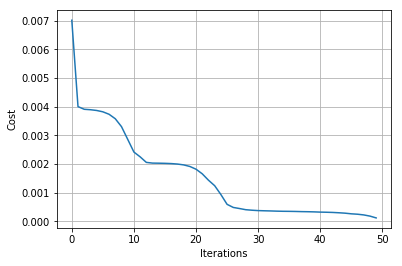

In [16]:
plt.plot(t.J)
plt.grid(1)
xlabel('Iterations')
ylabel('Cost');

In [17]:
pd.DataFrame({'y_predicted': t.N.y_hat.flatten().tolist(),
           'y_observed': y.flatten().tolist()})

,y_observed,y_predicted
0,0.75,0.749740
1,0.82,0.826891
2,0.93,0.915914


In [18]:
df_results = pd.DataFrame({'y_predicted': t.N.y_hat.flatten().tolist(),
           'y_observed': y.flatten().tolist()})

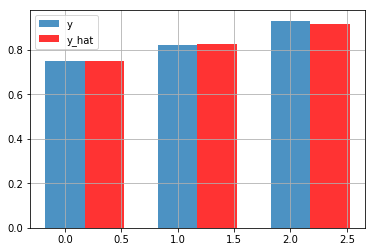

In [19]:
# Compare estimate, y_hat, to actually score

plt.bar([0,1,2], df_results.y_observed, width = 0.35, alpha=0.8);
plt.bar([0.35,1.35,2.35], df_results.y_predicted, width = 0.35, color='r', alpha=0.8)
plt.grid(1)
legend(['y', 'y_hat']);

## Review
1. What happens if you decrease maxiter for the Trainer? 
2. What happens if you increase maxiter for the Trainer?
3. Why does this happen? Think about the gradient.
4. What happens if you don't scale the data?